# ML Labs Programs - Sem 6

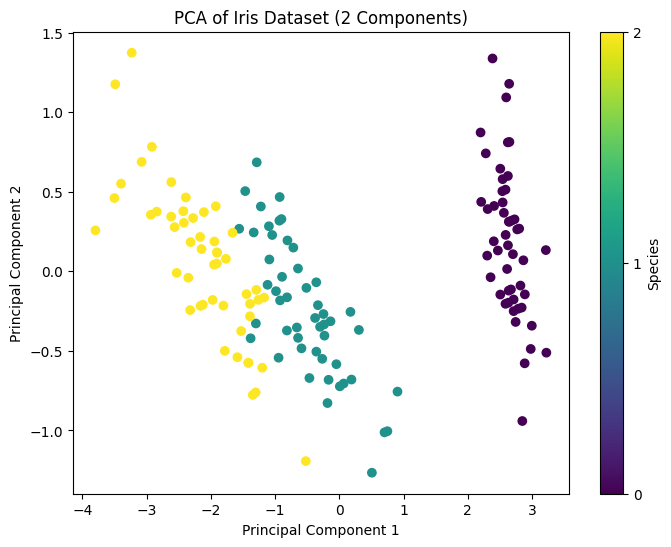

In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def pca(X, n_components):
    """
    Performs Principal Component Analysis (PCA).

    Args:
        X (numpy.ndarray): Input data matrix (n_samples, n_features).
        n_components (int): Number of principal components to retain.

    Returns:
        numpy.ndarray: Transformed data matrix (n_samples, n_components).
    """

    # 1. Center the data
    X_meaned = X - np.mean(X, axis=0)

    # 2. Compute the covariance matrix
    cov_mat = np.cov(X_meaned, rowvar=False)

    # 3. Compute eigenvalues and eigenvectors
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

    # 4. Sort eigenvalues and eigenvectors in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]

    # 5. Select the top n_components eigenvectors
    principal_components = sorted_eigenvectors[:, :n_components]

    # 6. Transform the data
    X_transformed = np.dot(X_meaned, principal_components)

    return X_transformed

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA to reduce dimensionality to 2 components
X_pca = pca(X, 2)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset (2 Components)')
plt.colorbar(ticks=np.unique(y), label='Species')
plt.show()

In [2]:
import pandas as pd

def find_s_algorithm():
    # Define the dataset directly instead of reading from a CSV file
    data = pd.DataFrame({
        'Sky': ['Sunny', 'Sunny', 'Cloudy', 'Rainy', 'Sunny'],
        'Temperature': ['Warm', 'Hot', 'Warm', 'Cold', 'Warm'],
        'Humidity': ['Normal', 'High', 'High', 'Normal', 'Normal'],
        'Wind': ['Strong', 'Weak', 'Strong', 'Strong', 'Weak'],
        'PlayTennis': ['Yes', 'No', 'Yes', 'No', 'Yes']  # Target column
    })

    print("Training data:")
    print(data)

    attributes = data.columns[:-1]  # All columns except the last one
    class_label = data.columns[-1]  # The last column is the target variable

    hypothesis = ['?' for _ in attributes]  # Initialize with the most general hypothesis

    for index, row in data.iterrows():
        if row[class_label] == 'Yes':  # Process only positive examples
            for i, value in enumerate(row[attributes]):
                if hypothesis[i] == '?' or hypothesis[i] == value:
                    hypothesis[i] = value  # Retain attribute value if it matches
                else:
                    hypothesis[i] = '?'  # Generalize otherwise

    return hypothesis


# Run the algorithm without worrying about file paths
hypothesis = find_s_algorithm()
print("\nThe final hypothesis is:", hypothesis)

Training data:
      Sky Temperature Humidity    Wind PlayTennis
0   Sunny        Warm   Normal  Strong        Yes
1   Sunny         Hot     High    Weak         No
2  Cloudy        Warm     High  Strong        Yes
3   Rainy        Cold   Normal  Strong         No
4   Sunny        Warm   Normal    Weak        Yes

The final hypothesis is: ['Sunny', 'Warm', 'Normal', '?']


Predictions for k=1: [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 1. 2.
 2. 2.]


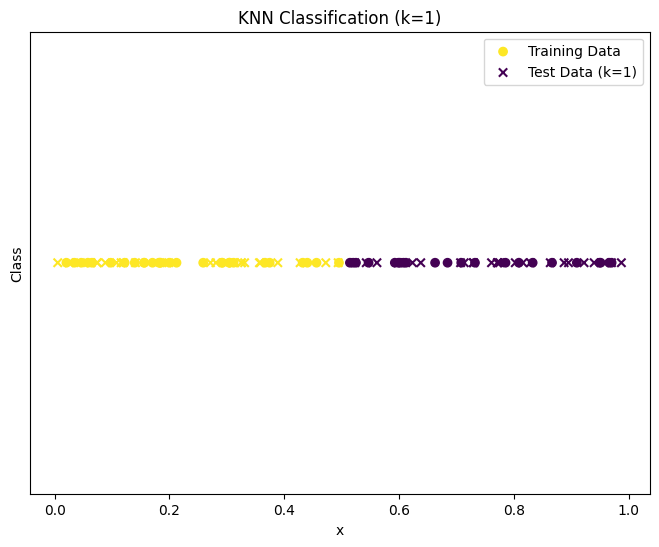

Predictions for k=2: [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2.
 2. 2.]


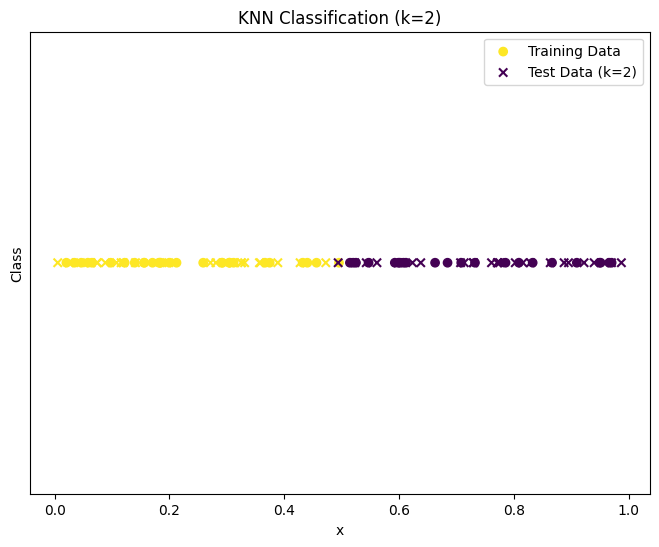

Predictions for k=3: [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2.
 2. 2.]


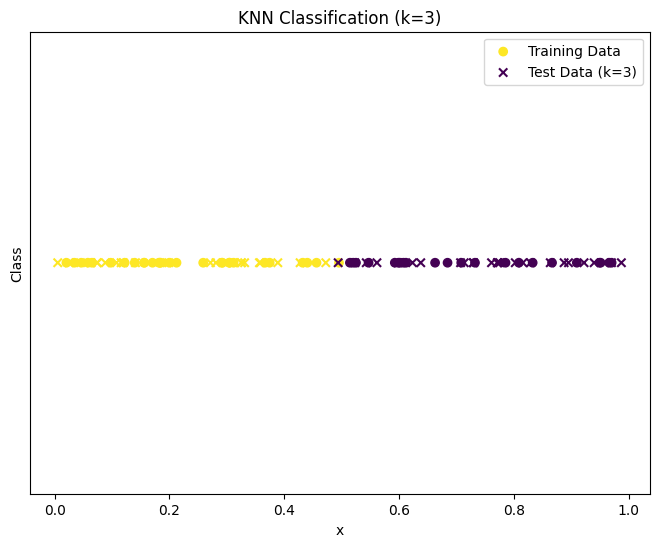

Predictions for k=4: [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2.
 2. 2.]


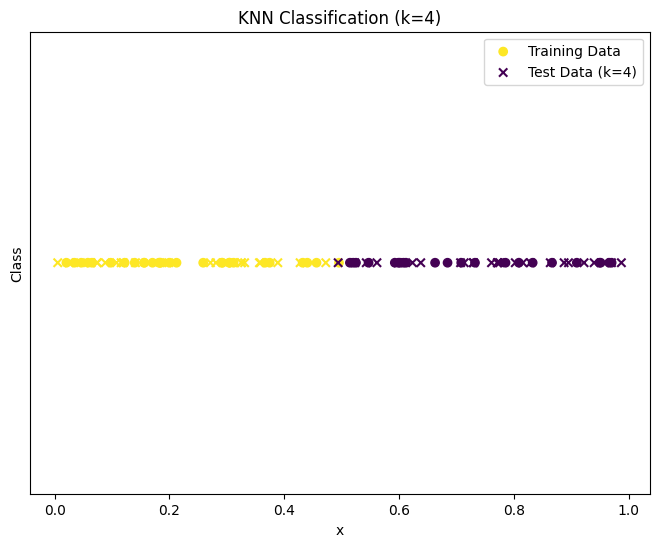

Predictions for k=5: [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2.
 2. 2.]


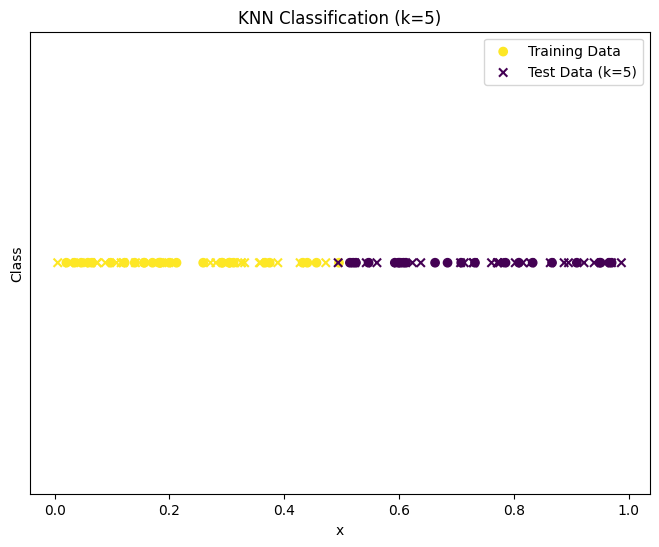

Predictions for k=20: [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2.
 2. 2.]


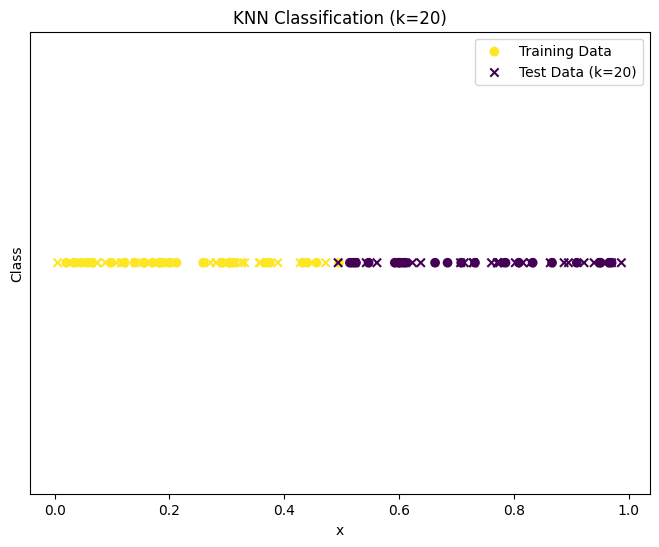

Predictions for k=30: [1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 1.
 1. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 1. 2.
 2. 2.]


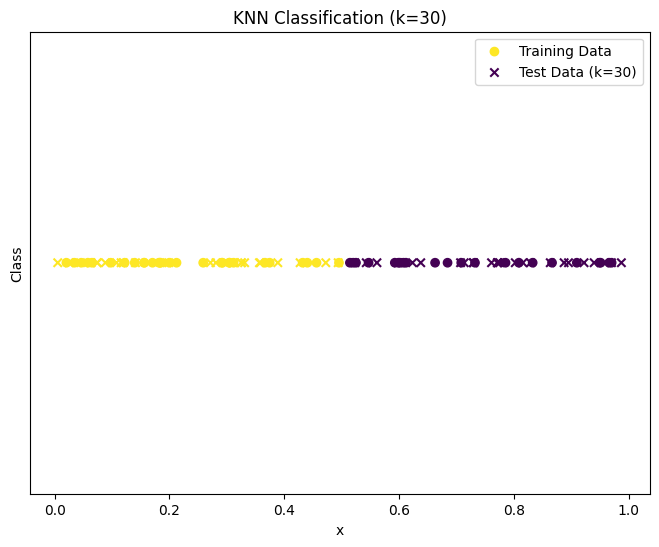

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def knn_classify(train_x, train_y, test_x, k):
    """
    Classifies test_x using k-Nearest Neighbors algorithm.

    Args:
        train_x: Training data features (1D array).
        train_y: Training data labels (1D array).
        test_x: Test data features (1D array).
        k: Number of neighbors to consider.

    Returns:
        Predicted labels for test_x (1D array).
    """

    predictions = []
    for test_point in test_x:
        distances = np.abs(train_x - test_point)  # Calculate absolute distances
        nearest_indices = np.argsort(distances)[:k]  # Find indices of k nearest neighbors
        nearest_labels = train_y[nearest_indices]

        # Determine the most frequent label among the k neighbors
        unique_labels, counts = np.unique(nearest_labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(counts)]
        predictions.append(predicted_label)

    return np.array(predictions)

# Generate 100 random values in the range [0, 1]
np.random.seed(42)  # For reproducibility
x = np.random.rand(100)

# Label the first 50 points
y = np.zeros(100)
y[:50] = (x[:50] <= 0.5).astype(int) + 1 #Class 1 if <= 0.5, Class 2 otherwise
y[50:] = -1 # initialize test values to -1, they will be overriden by knn prediction

# Split data into training and test sets
train_x, train_y = x[:50], y[:50]
test_x = x[50:]

# Classify the remaining points using KNN for different values of k
k_values = [1, 2, 3, 4, 5, 20, 30]
predictions = {}

for k in k_values:
    predictions[k] = knn_classify(train_x, train_y, test_x, k)
    y[50:] = predictions[k]
    print(f"Predictions for k={k}: {predictions[k]}")

    # Plot the results for each k
    plt.figure(figsize=(8, 6))
    plt.scatter(train_x, np.zeros_like(train_x), c=train_y, marker='o', label='Training Data')
    plt.scatter(test_x, np.zeros_like(test_x), c=predictions[k], marker='x', label=f'Test Data (k={k})')
    plt.xlabel('x')
    plt.ylabel('Class')
    plt.title(f'KNN Classification (k={k})')
    plt.legend()
    plt.yticks([]) #remove y axis ticks
    plt.show()

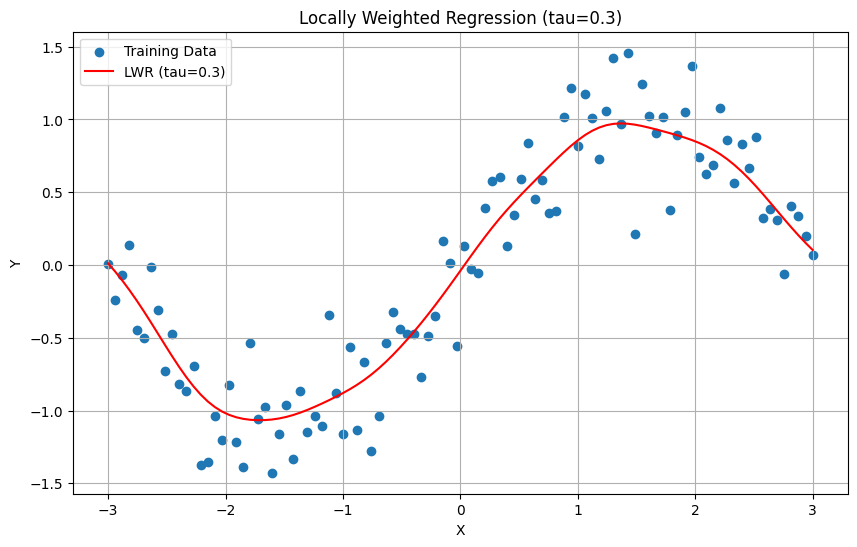

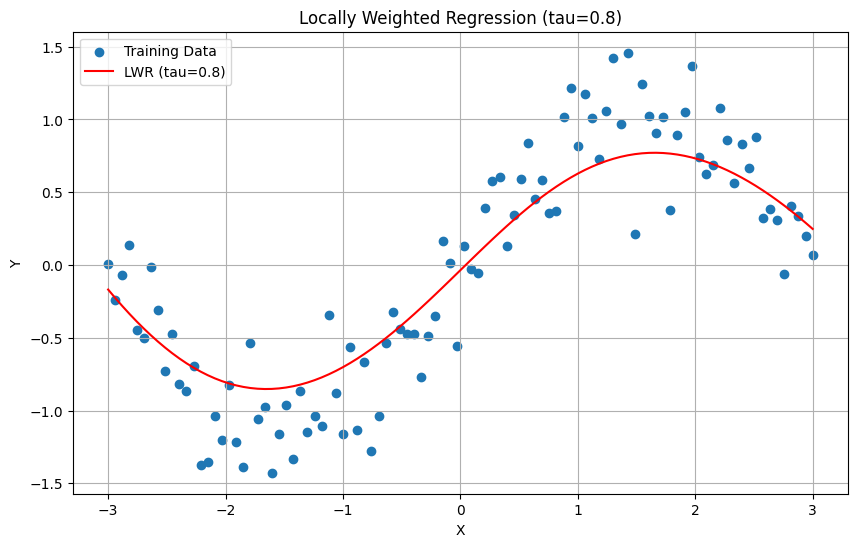

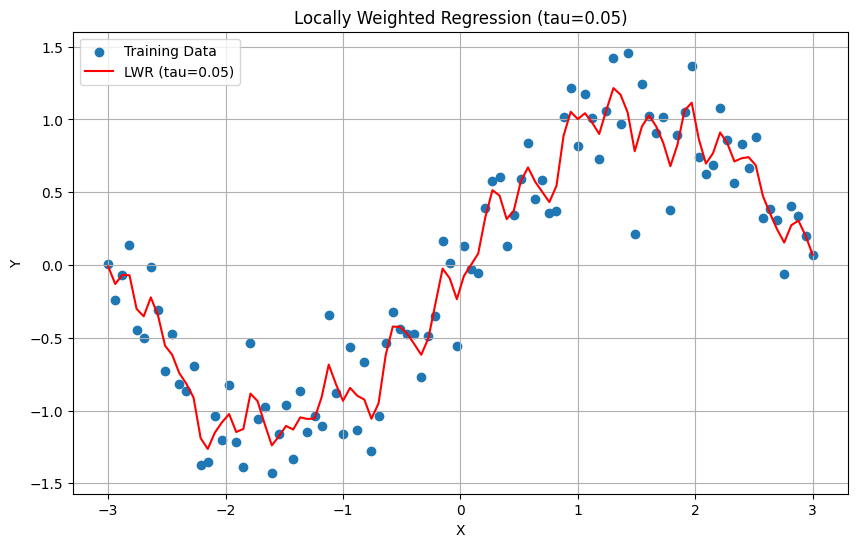

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(x, X, Y, tau):
    """
    Performs locally weighted regression.

    Args:
        x: The query point.
        X: The training data points (features).
        Y: The training data points (targets).
        tau: The bandwidth parameter.

    Returns:
        The predicted value at the query point.
    """
    # Fix: Calculate weights using broadcasting with the feature column (X[:, 1])
    weights = np.exp(-((x[1] - X[:, 1]) ** 2) / (2 * tau ** 2))  
    W = np.diag(weights)
    try:
        beta = np.linalg.pinv(X.T @ W @ X) @ X.T @ W @ Y
    except np.linalg.LinAlgError:
        print("Singular matrix encountered. Returning NaN")
        return np.nan

    return beta @ x

def generate_noisy_data(n=100):
    """Generates noisy sinusoidal data."""
    np.random.seed(42)  # For reproducibility
    X = np.linspace(-3, 3, n)
    Y = np.sin(X) + np.random.normal(0, 0.3, n)
    return X, Y

def plot_lwr(X, Y, tau):
    """Plots the locally weighted regression results."""
    x_test = np.linspace(min(X[:, 1]), max(X[:, 1]), 100) # Extract the second column (feature values)
    x_test = np.array([[1, x] for x in x_test])  # Add bias term
    y_pred = [locally_weighted_regression(x, X, Y, tau) for x in x_test]

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:,1], Y, label="Training Data") # plotting the second column of X as features
    plt.plot(x_test[:,1], y_pred, color="red", label=f"LWR (tau={tau})") # plotting the second column of x_test as features
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Locally Weighted Regression (tau={tau})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example Usage
X, Y = generate_noisy_data()
X = np.array([[1, x] for x in X]) #adding bias term to feature matrix

# Test with different tau values
plot_lwr(X, Y, tau=0.3)
plot_lwr(X, Y, tau=0.8)
plot_lwr(X,Y, tau=0.05)

<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2120/929517823.py:39: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(url, sep='\s+', names=column_names, na_values="?")


Demonstrating Linear Regression and Polynomial Regression



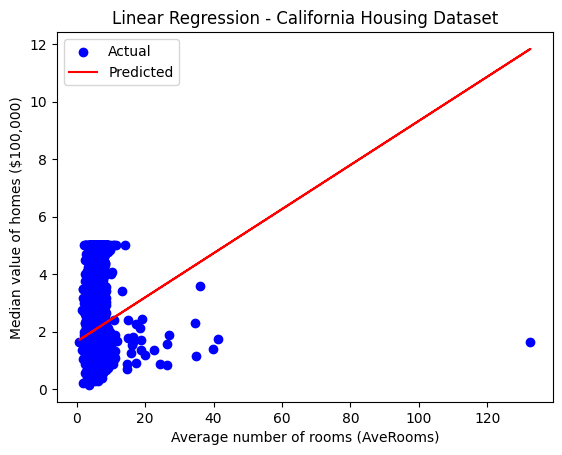

Linear Regression - California Housing Dataset
Mean Squared Error: 1.2923314440807299
R^2 Score: 0.013795337532284901


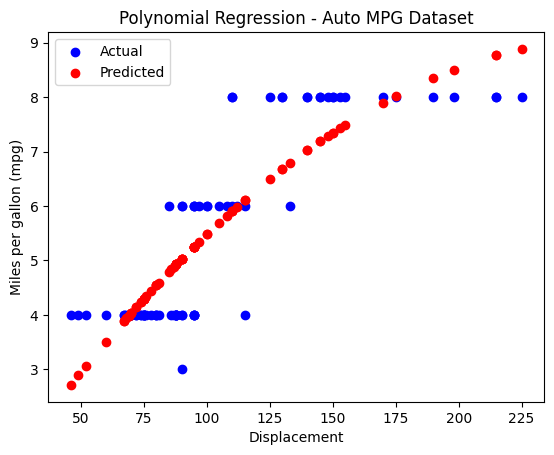

Polynomial Regression - Auto MPG Dataset
Mean Squared Error: 0.7431490557205861
R^2 Score: 0.7505650609469626


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

def linear_regression_california():
    housing = fetch_california_housing(as_frame=True)
    X = housing.data[["AveRooms"]] 
    y = housing.target 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.plot(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Average number of rooms (AveRooms)")
    plt.ylabel("Median value of homes ($100,000)")
    plt.title("Linear Regression - California Housing Dataset")
    plt.legend()
    plt.show()

    print("Linear Regression - California Housing Dataset")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))


def polynomial_regression_auto_mpg():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
    column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
    data = pd.read_csv(url, sep='\s+', names=column_names, na_values="?")
    data = data.dropna()

    X = data["displacement"].values.reshape(-1, 1) 
    y = data["mpg"].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
    poly_model.fit(X_train, y_train)

    y_pred = poly_model.predict(X_test)

    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.scatter(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Displacement")
    plt.ylabel("Miles per gallon (mpg)")
    plt.title("Polynomial Regression - Auto MPG Dataset")
    plt.legend()
    plt.show()

    print("Polynomial Regression - Auto MPG Dataset")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))


if __name__ == "__main__":
    print("Demonstrating Linear Regression and Polynomial Regression\n")
    linear_regression_california()
    polynomial_regression_auto_mpg()

Model Accuracy: 94.74%
Predicted Class for the new sample: Benign


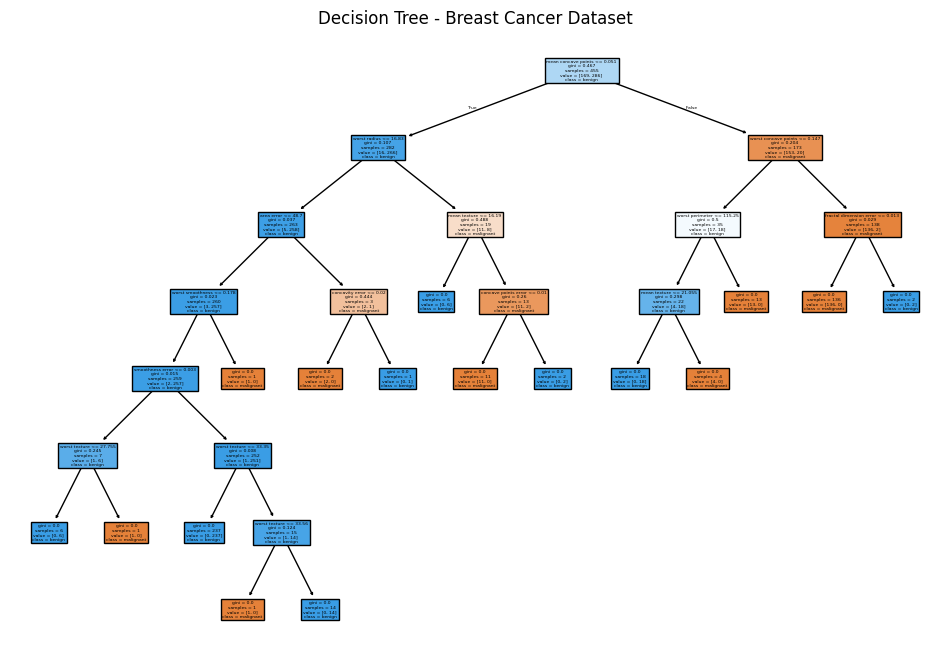

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
new_sample = np.array([X_test[0]])
prediction = clf.predict(new_sample)

prediction_class = "Benign" if prediction == 1 else "Malignant"
print(f"Predicted Class for the new sample: {prediction_class}")

plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree - Breast Cancer Dataset")
plt.show()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/codespace/scikit_learn_data
Accuracy: 80.83%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         2
           2       0.33      0.67      0.44         3
           3       1.00      0.00      0.00         5
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4
           8       1.00      0.67      0.80         3
           9       1.00      0.75      0.86         4
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.40      1.00      0.57         4
          13       1.00      0.80      0.89         5
          14       1.00      0.40      0.57         5
          15       0.67      1.0

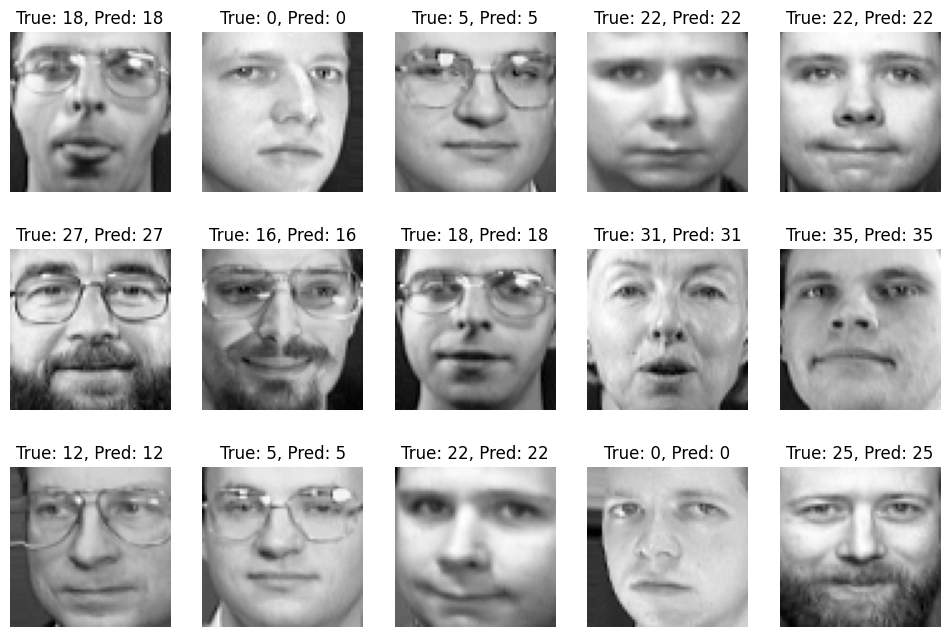

In [11]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

cross_val_accuracy = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')
print(f'\nCross-validation accuracy: {cross_val_accuracy.mean() * 100:.2f}%')

fig, axes = plt.subplots(3, 5, figsize=(12, 8))
for ax, image, label, prediction in zip(axes.ravel(), X_test, y_test, y_pred):
    ax.imshow(image.reshape(64, 64), cmap=plt.cm.gray)
    ax.set_title(f"True: {label}, Pred: {prediction}")
    ax.axis('off')

plt.show()

Confusion Matrix:
[[175  37]
 [ 13 344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       212
           1       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.92      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



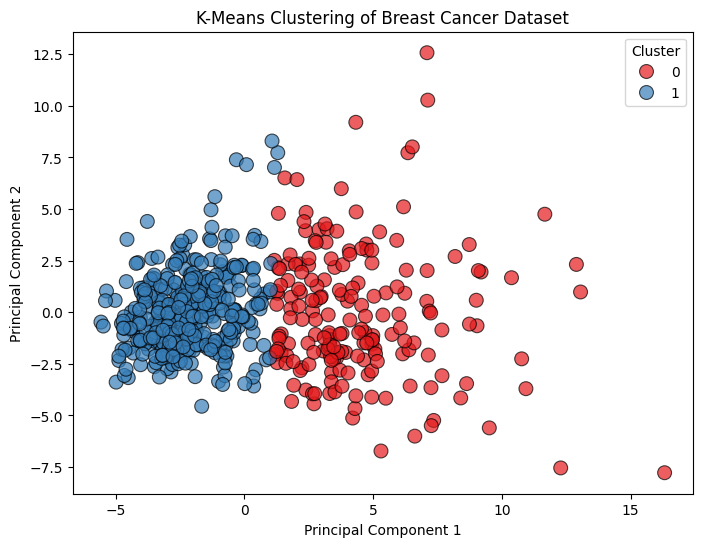

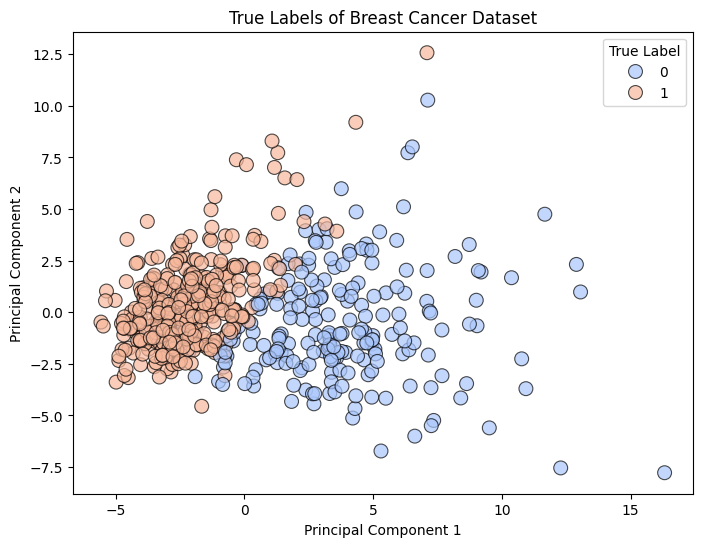

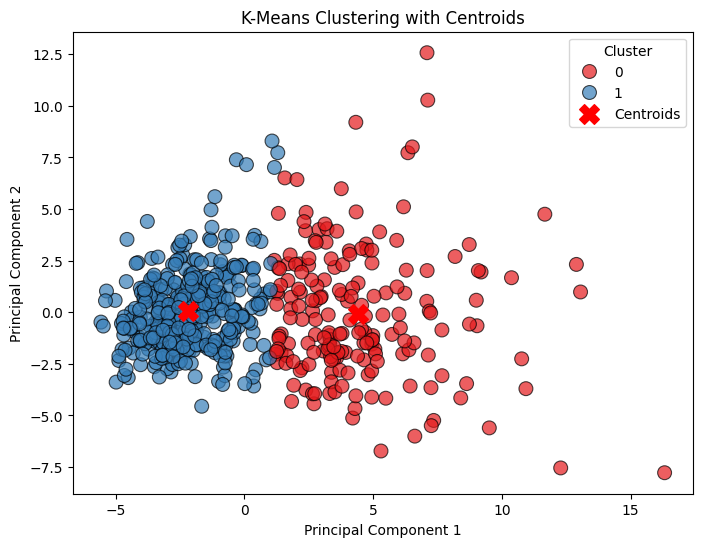

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y, y_kmeans))
print("\nClassification Report:")
print(classification_report(y, y_kmeans))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = y_kmeans
df['True Label'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, edgecolor='black', alpha=0.7)
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='True Label', palette='coolwarm', s=100, edgecolor='black', alpha=0.7)
plt.title('True Labels of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="True Label")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, edgecolor='black', alpha=0.7)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()